In [2]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
import cv2
from collections import Counter
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter
import math
from scipy.signal import convolve2d, gaussian, fftconvolve

/home/ziyaad/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [14]:
def twodCorrelate(f,w):
    M,N=np.shape(f)
    m,n=np.shape(w)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    g=np.zeros((M,N),dtype=float)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=f[i,k]
                    else:
                        g[i,k]+=w[A+a,B+b]*f[i+A,k+B]
    return g


In [15]:
def twodConvolve(f,w):
    rotw=w
    M,N=np.shape(f)
    m,n=np.shape(rotw)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    g=np.zeros((M,N),dtype=float)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=f[i,k]
                    else:
                        g[i,k]+=rotw[A+a,B+b]*f[i-A,k-B]
    return g

In [ ]:
def LowPassFilter(im,filter):
    M,N=np.shape(im)
    g=np.zeros((M,N),dtype=float)
    m,n=np.shape(filter)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=im[i,k]
                    else:
                        g[i,k]+=filter[A+a,B+b]*im[i+A,k+B]
    return g    

(768, 1024)
[[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111 0.11111111
  0.11111111 0.11111111 0.11111111]]


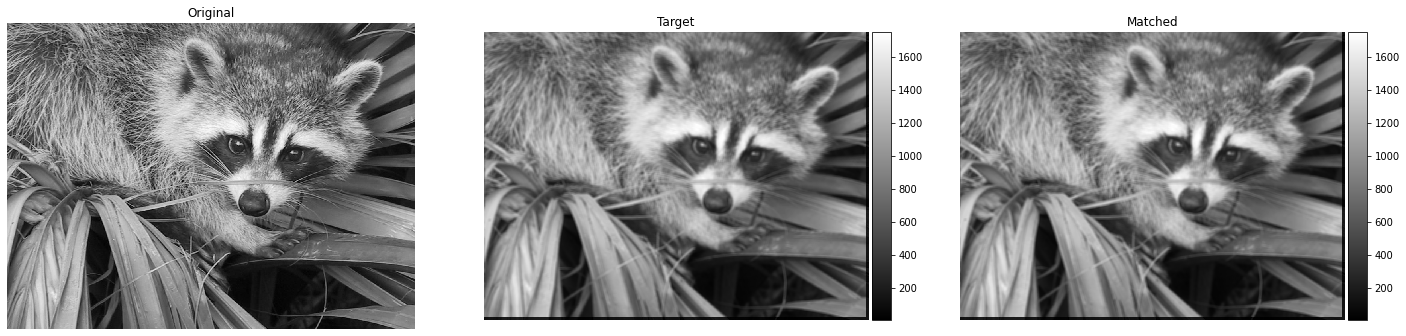

In [18]:
face=cv2.imread("face.png",0)
print(np.shape(face))
w=np.ones([9,9])/9
print(w)
g1=twodCorrelate(face,w)
g2=twodConvolve(face,w)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(face, cmap='gray'),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(g1, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(g2,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

[[ 0.         -1.          1.41421356]
 [ 1.          0.         -1.        ]
 [-1.41421356  1.          0.        ]]


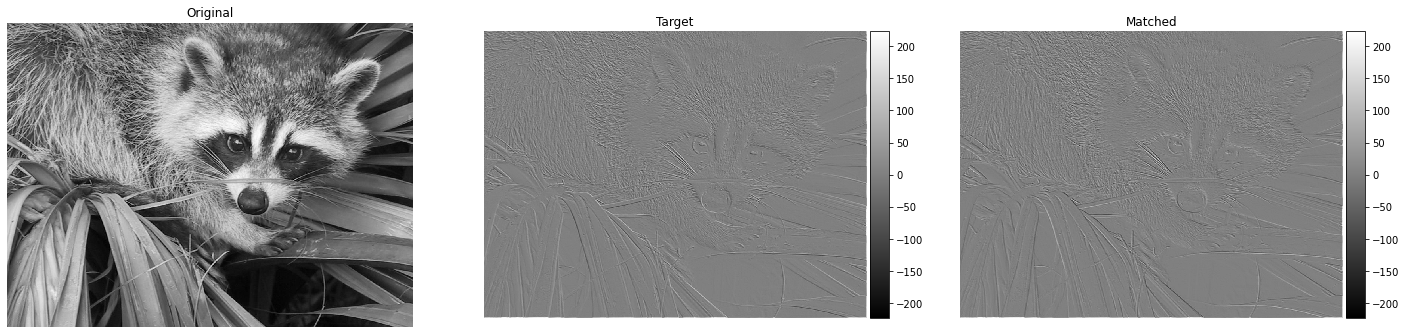

In [19]:
ripple=np.array([ [0,-1,math.sqrt(2)],[1,0,-1],[-math.sqrt(2),1,0] ])
print(ripple)
g3=twodCorrelate(face,ripple)
g4=twodConvolve(face,ripple)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(face),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(g3, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(g4,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

[[ 0.          1.         -1.41421356]
 [-1.          0.          1.        ]
 [ 1.41421356 -1.          0.        ]]


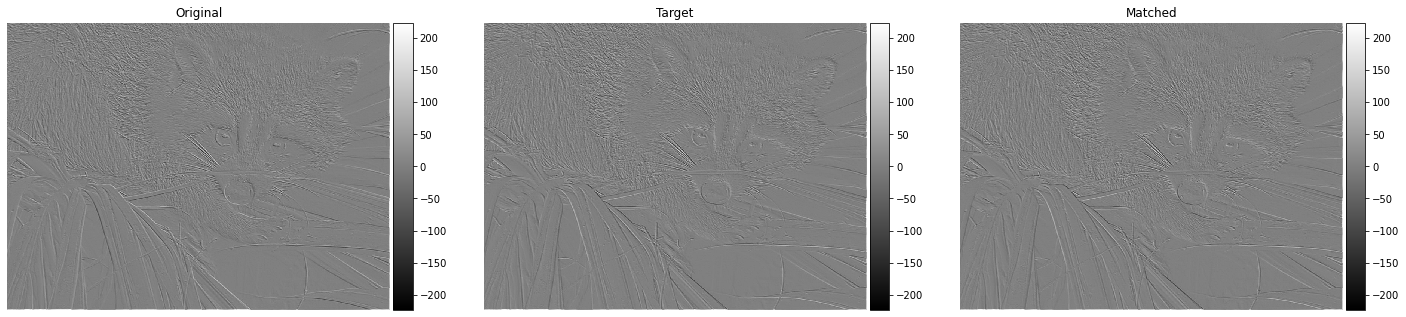

In [22]:
rotripple=np.rot90(ripple)
rotripple=np.rot90(rotripple)
print(rotripple)
g5=twodCorrelate(face,rotripple)
fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(g3,cmap='gray'),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(g4, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(g5,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

In [24]:
def gaussian2DFilter(shape,sigma):
    g=np.outer(gaussian(shape,sigma), gaussian(shape,sigma))
    return g

In [25]:
g=gaussian2DFilter(5,1)
print(g)

[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]


In [ ]:
pepper=cv2.imread("pepper.tif",0)


In [27]:
def LowPassFilter(im,filter):
    M,N=np.shape(im)
    g=np.zeros((M,N),dtype=float)
    m,n=np.shape(filter)
    a=math.floor((m-1)/2)
    b=math.floor((n-1)/2)
    for i in range(0,M):
        for k in range(0,N):
            for A in range(-a,a):
                for B in range(-b,b):
                    if i==0 or i>=M-m or k==0 or k>=N-n:
                        g[i,k]=im[i,k]
                    else:
                        g[i,k]+=filter[A+a,B+b]*im[i+A,k+B]
    return g    

[[0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716]
 [0.00591716 0.00591716 0.00591716 0.00591716 0.00591716 0.00591716
  0.00591716 0.00591716 0.005917

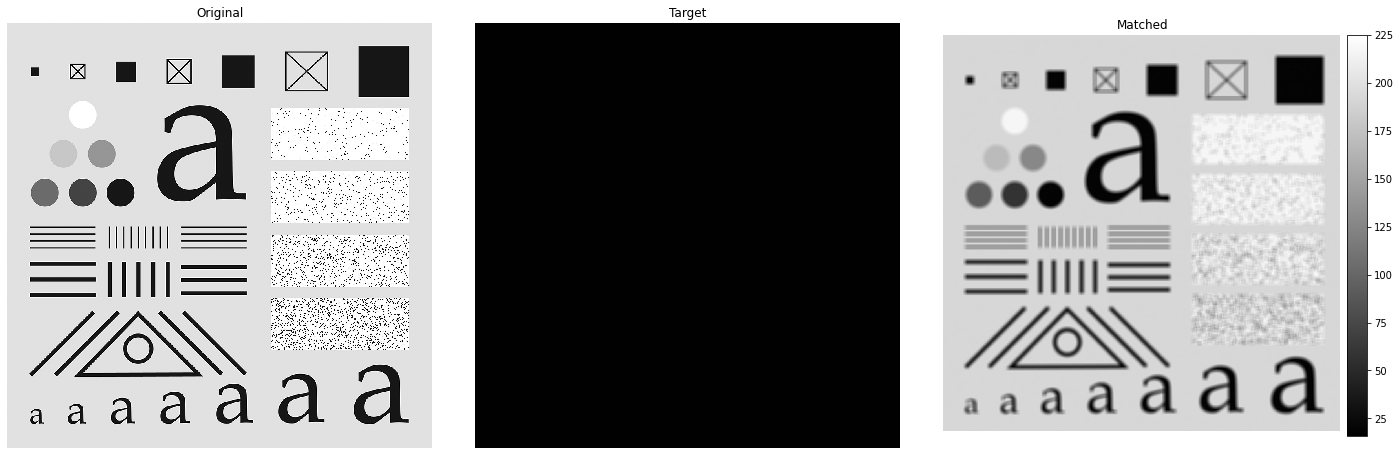

In [30]:
tpattern=cv2.imread("testpattern1024.tif",0)
box=np.ones([13,13])/169
print(box)
output=LowPassFilter(tpattern,box)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(tpattern,cmap='gray'),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(box, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(output,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

In [43]:
def Laplacian(im):
    M,N=np.shape(im)
    g=np.zeros((M,N),dtype=float)
    for i in range(0,M):
        for k in range(0,N):
            if i==0 or i>=M-1 or k==0 or k>=N-1:
                    g[i,k]=im[i,k]
            else:
                    g[i,k]=5*im[i,k]-(im[i+1,k]+im[i-1,k]+im[i,k+1]+im[i,k-1])
            # p=im[i,k]
            
    return g    

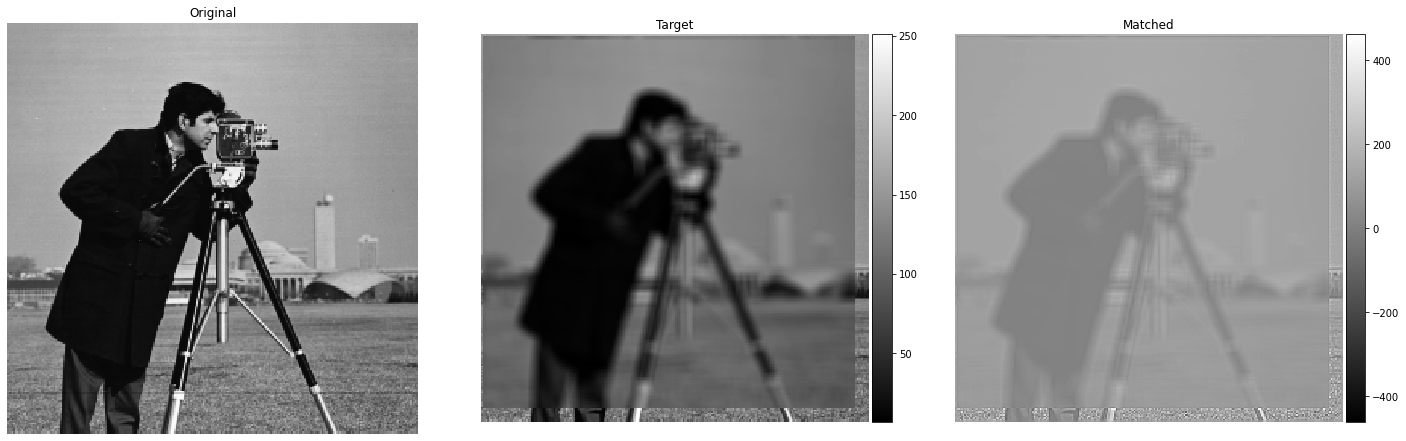

In [49]:
cameraman=cv2.imread("cameraman.tif",0)
LapFilter=np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
Blur=np.ones([9,9])/81
blurred=LowPassFilter(cameraman,Blur)
output=Laplacian(blurred)

fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(cameraman,cmap='gray'),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(blurred, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(output,cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')